In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
from src.simple_utils import load_pickle
from src.data_utils import cifar10_label_names, get_dataset
from os.path import join

In [5]:
alpha = 0.5
markersize = 12
# number of point figures to plot
num_figs = 15

In [66]:
workdir = "/n/holystore01/LABS/barak_lab/Lab/nghosh"
# pred_dirs specifies location of "+".join(pred_dirs).pkl in processed
pred_dirs = ["cifar5m"]
# score_dirs specifies score group to consider (can be different from pred_dirs) 
score_dirs = ["cifar5m"]

class_lists = {"CIFAR5m": cifar10_label_names, "CIFAR10_test": cifar10_label_names}

# name of dataset to consider
name = "CIFAR5m"
# name of training dataset
train_set = "CIFAR10_train"
valid_set = "CIFAR10_test"

pred_dirs.sort()
score_dirs.sort()
group_dir = "+".join(pred_dirs)
score_dir = join("scores", "+".join(score_dirs))
save_dir = join(workdir, "figures", group_dir)

data_dir = "data"
proc_dir = "processed"

In [115]:
score_types = ["MaxDiffScore", "AreaScore"]
score_type = score_types[0]

In [116]:
print("loading data")
grouped = load_pickle(join(workdir, proc_dir, group_dir + ".pkl"))
scores = load_pickle(join(workdir, proc_dir, score_dir + "_" + score_type + ".pkl"))
print("done")

loading data
done


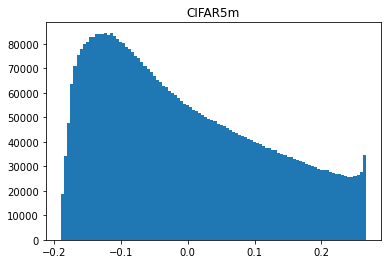

score rank 10^4 0.265244


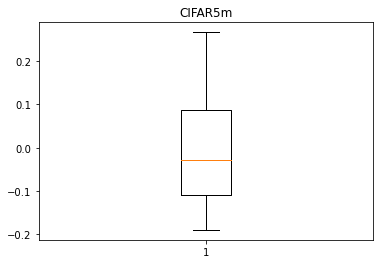

In [9]:
plt.figure()
plt.hist(scores[name]['vals'], bins=100)
plt.title(name)
plt.show()

print('score rank 10^4 %f' % (scores[name]['vals'][10000]))

plt.figure()
plt.boxplot(scores[name]['vals'])
plt.title(name)
plt.show()

In [10]:
print("loading dataset")
dataset = get_dataset(join(workdir, data_dir), name)
print("done")

classes = cifar10_label_names

# dataset sizes
default_sizes = {"CIFAR10_train": 50000, "CIFAR10_test": 10000}

# plot group plotting symbols
fmts = {
    "Resnet18": "bo",
    "Densenet121": "ro",
    "Resnet18-pretrained": "c^",
    "Densenet121-pretrained": "m^",
    "ClipViTB32": "go",
}

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
if not os.path.isdir(join(save_dir, name)):
    os.mkdir(join(save_dir, name))

loading dataset
reading cifar 5m data from /n/holystore01/LABS/barak_lab/Everyone/cifar-5m
reading class 0
reading class 1
reading class 2
reading class 3
reading class 4
reading class 5
reading class 6
reading class 7
reading class 8
reading class 9
done


In [117]:
# points - fixed random index subset
# small - smallest non-monotonicity scores
# weird - largest non-monotonicity scores
ind_types = ["points", "small", "weird"]
ind_type = ind_types[2]

# fixed indices chosen by ind_style = "points"
ind_fixed = [1022, 1252, 1977, 2573, 2977, 4974, 5564, 6935, 7170, 7251, 7901, 8002, 8042, 9598, 9773]
offset = 0

if ind_type == "weird":
    indexes = scores[name]["idx"][offset:(offset + num_figs)].astype(int)
elif ind_type == "small":
    indexes = scores[name]["idx"][-(offset + num_figs):-(offset+1)].astype(int)
elif ind_type == "points":
    indexes = ind_fixed[:num_figs]
else:
    raise ValueError("unavailable index type %s" % ind_type)

In [118]:
from collections import Counter

classes = dataset.data_y[scores[name]["idx"]]
n = 100000
cnt = Counter(classes[:n])
for c, val in cnt.most_common():
    print(f"{class_lists[name][c]}: {100 * val / n:,.2f}%")

dog: 38.09%
bird: 11.69%
cat: 9.44%
plane: 7.40%
car: 7.26%
horse: 6.96%
deer: 6.22%
frog: 5.65%
ship: 5.05%
truck: 2.23%


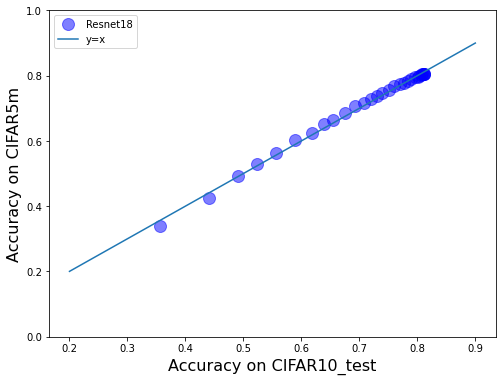

In [99]:
plt.figure(figsize=(8, 6))
for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        n = len(dct["points"])
        x = dct["x"]
        k = len(x)
        subset = np.empty((n, k))
        for i in range(n):
            idx = scores[name]["idx"][i]
            subset[i] = dct["points"][idx]
        subset_mean = np.mean(subset, axis=0)
        plt.plot(x, subset_mean, fmts[plot_group], alpha=alpha, markersize=markersize, label=plot_group)

plt.xlabel("Accuracy on %s" % valid_set, fontsize=16)
plt.ylabel("Accuracy on CIFAR5m", fontsize=16)
plt.plot([0.2, 0.9], [0.2, 0.9], label="y=x")
plt.ylim(0, 1)
plt.legend(loc="best")
plt.show()

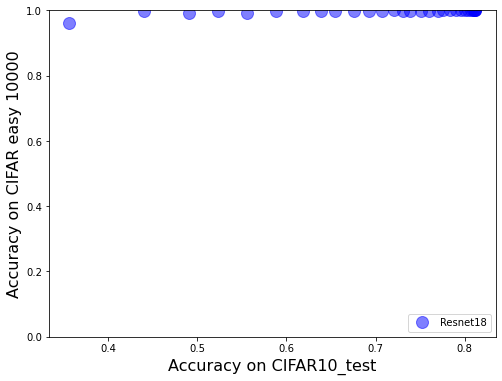

In [113]:
plt.figure(figsize=(8, 6))
n = 10000
for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        
        x = dct["x"]
        k = len(x)
        subset = np.empty((n, k))
        for i in range(n):
            idx = scores[name]["idx"][-(i+1)]
            subset[i] = dct["points"][idx]
        subset_mean = np.mean(subset, axis=0)
        plt.plot(x, subset_mean, fmts[plot_group], alpha=alpha, markersize=markersize, label=plot_group)

plt.xlabel("Accuracy on %s" % valid_set, fontsize=16)
plt.ylabel("Accuracy on CIFAR easy %d" % n, fontsize=16)
plt.ylim(0, 1)

plt.legend(loc="lower right")
plt.show()

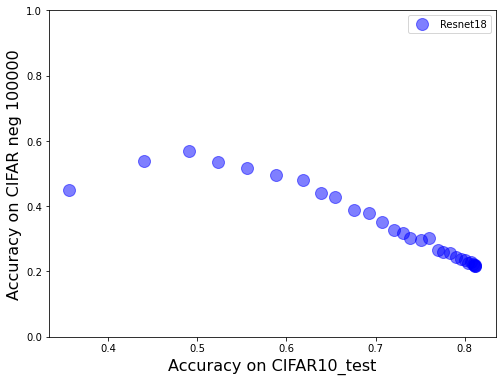

In [101]:
plt.figure(figsize=(8, 6))
n = 100000
for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        
        x = dct["x"]
        k = len(x)
        subset = np.empty((n, k))
        for i in range(n):
            idx = scores[name]["idx"][i]
            subset[i] = dct["points"][idx]
        subset_mean = np.mean(subset, axis=0)
        plt.plot(x, subset_mean, fmts[plot_group], alpha=alpha, markersize=markersize, label=plot_group)

plt.xlabel("Accuracy on %s" % valid_set, fontsize=16)
plt.ylabel("Accuracy on CIFAR neg %d" % n, fontsize=16)
plt.ylim(0, 1)

plt.legend(loc="best")
plt.show()

[4353317 2827237 3596090 3772895 2757976 1186110  586007 3781231 3203896
  868780 2937482 2805615 2870578 2982374 4028217]
index 4353317


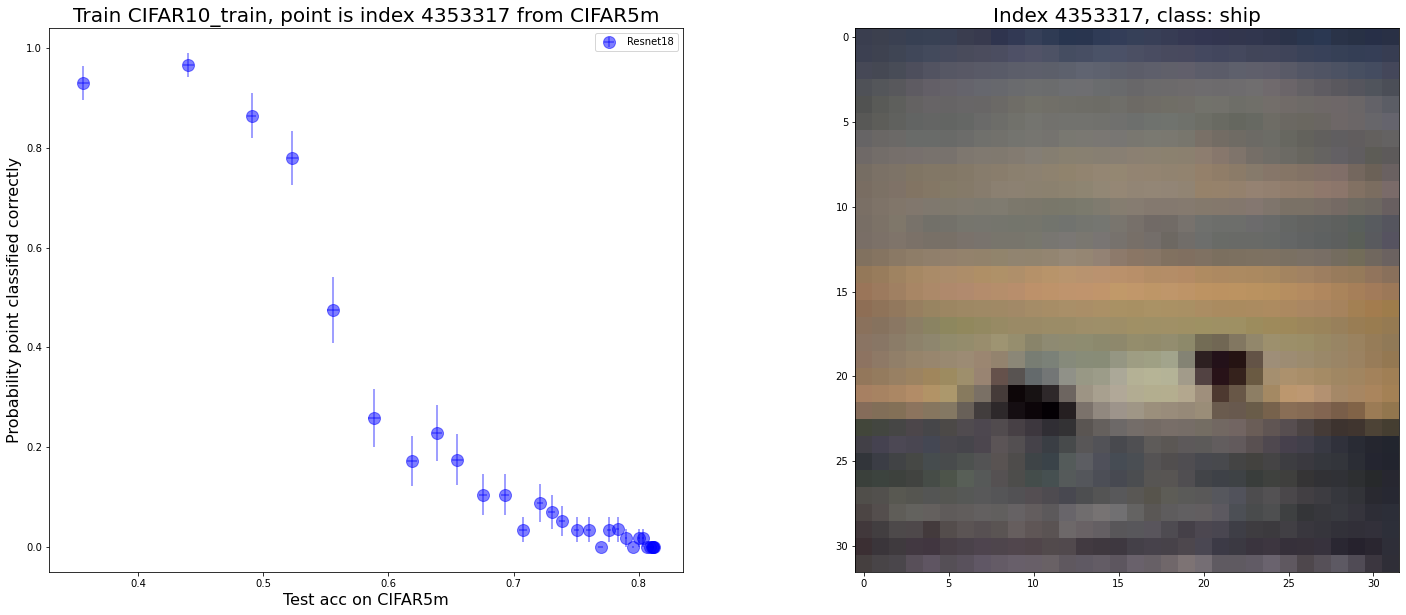

index 2827237


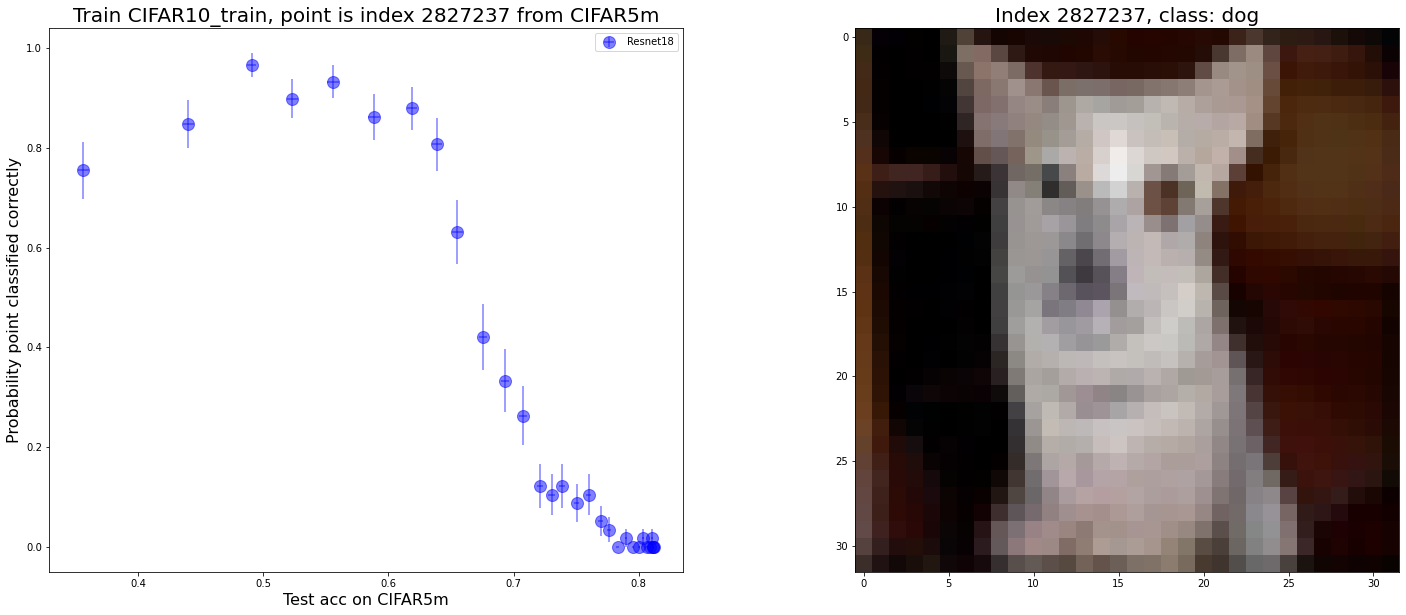

index 3596090


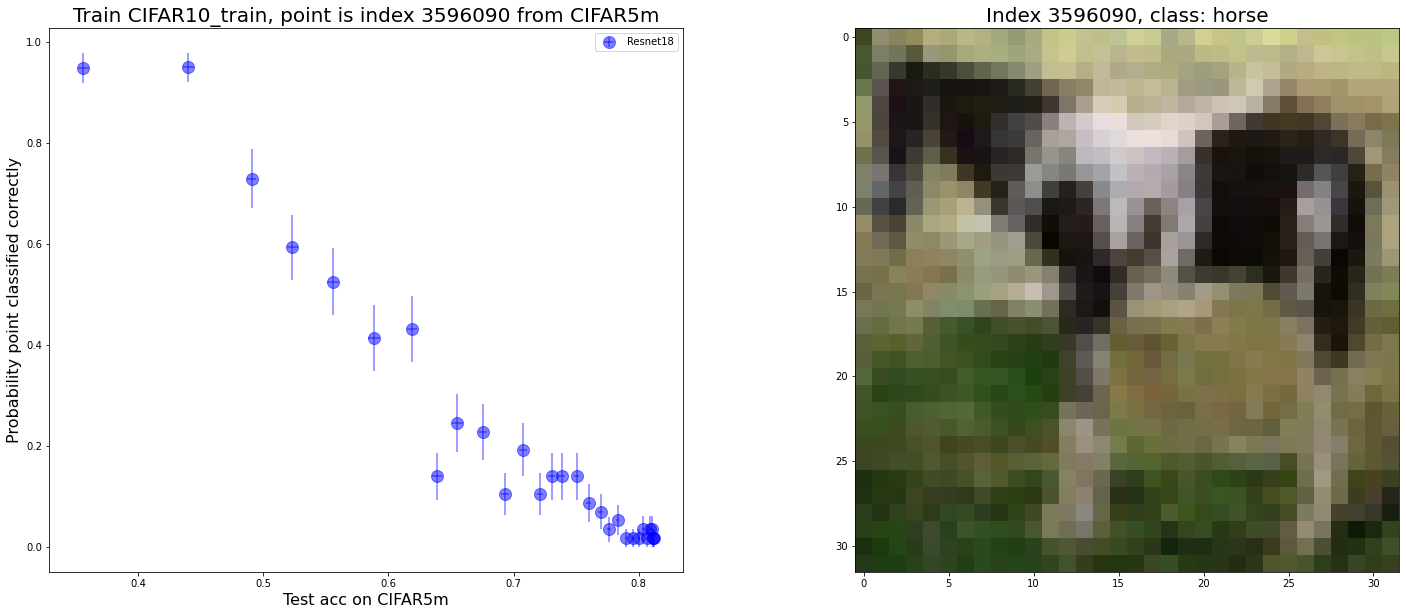

index 3772895


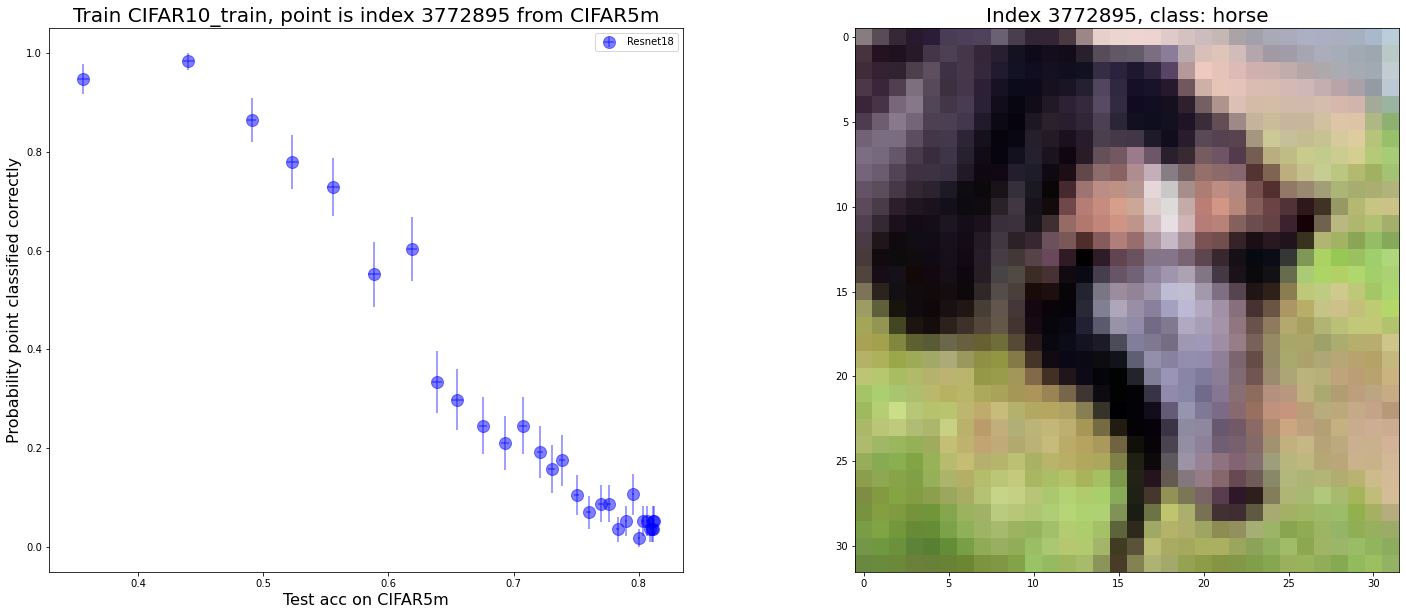

index 2757976


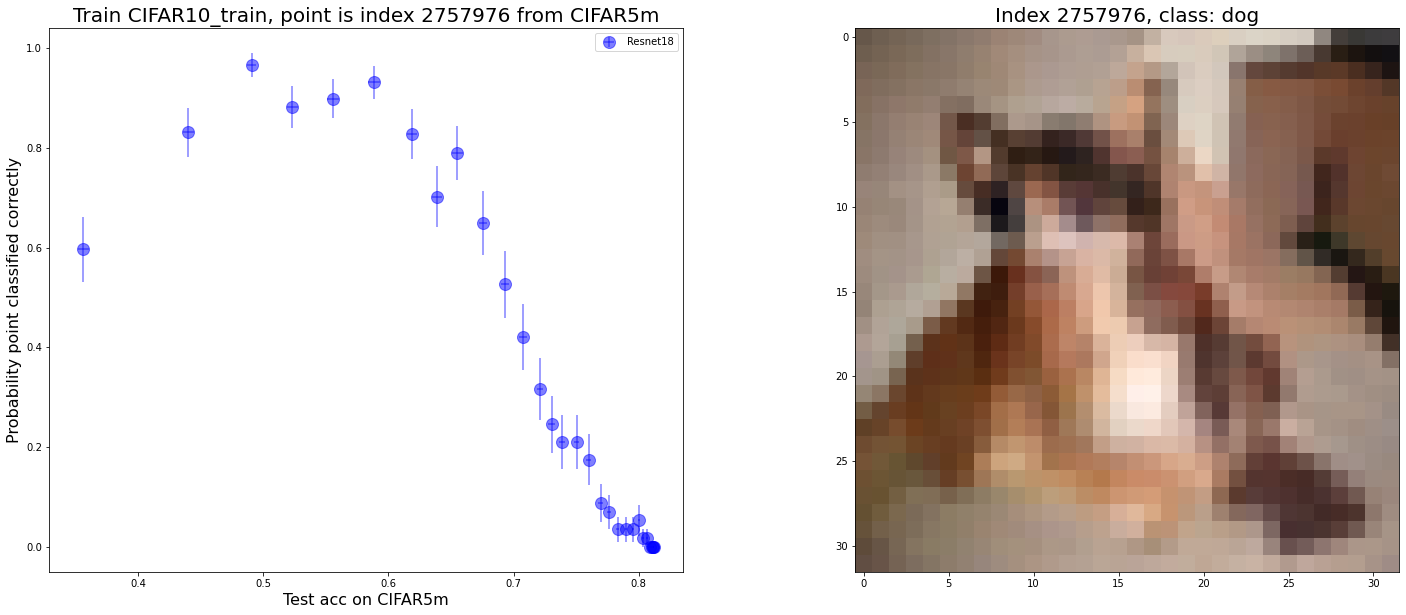

index 1186110


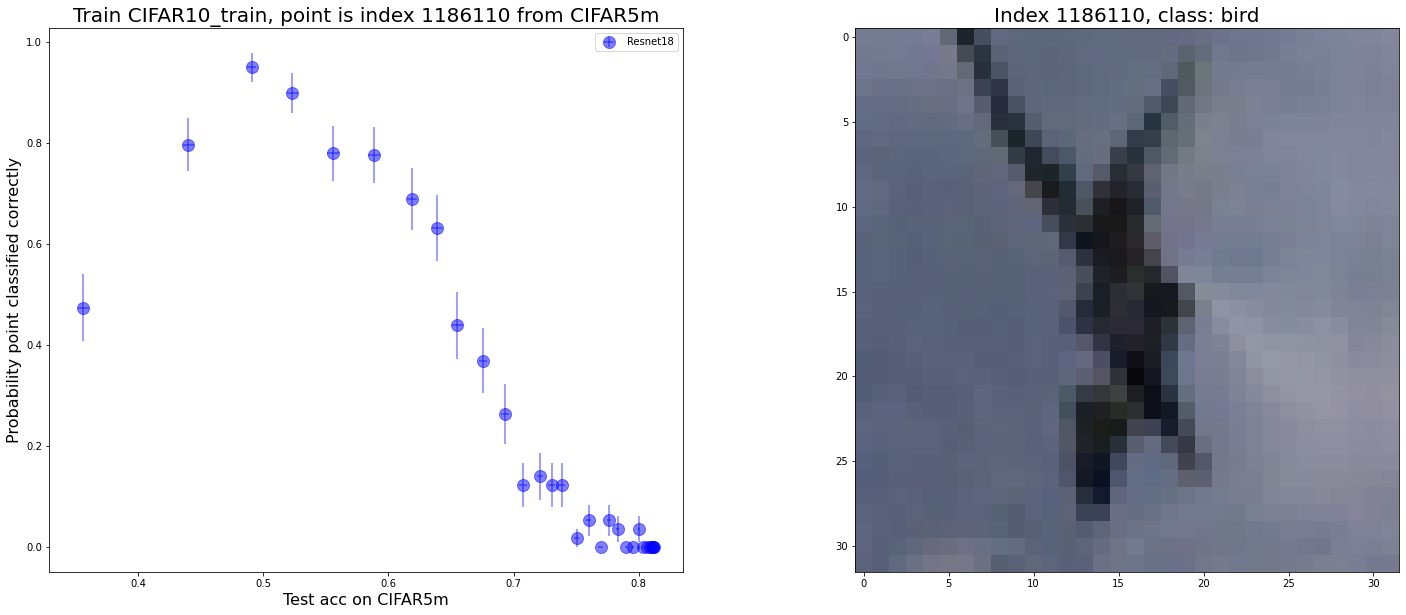

index 586007


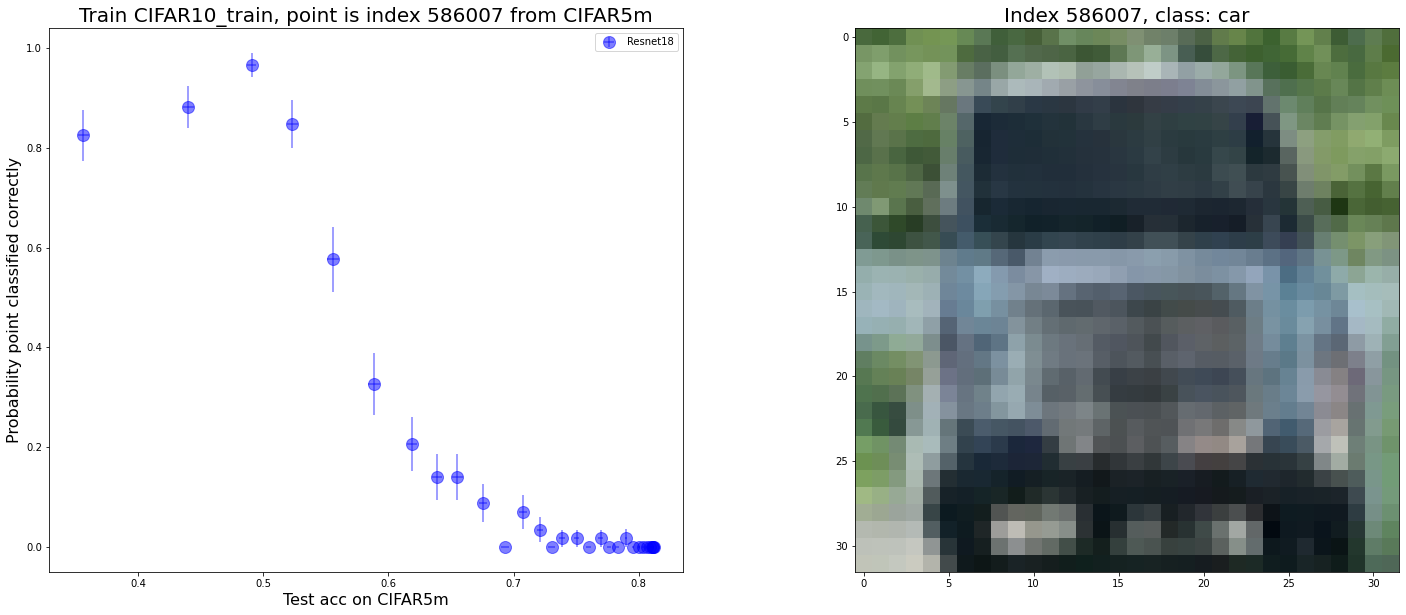

index 3781231


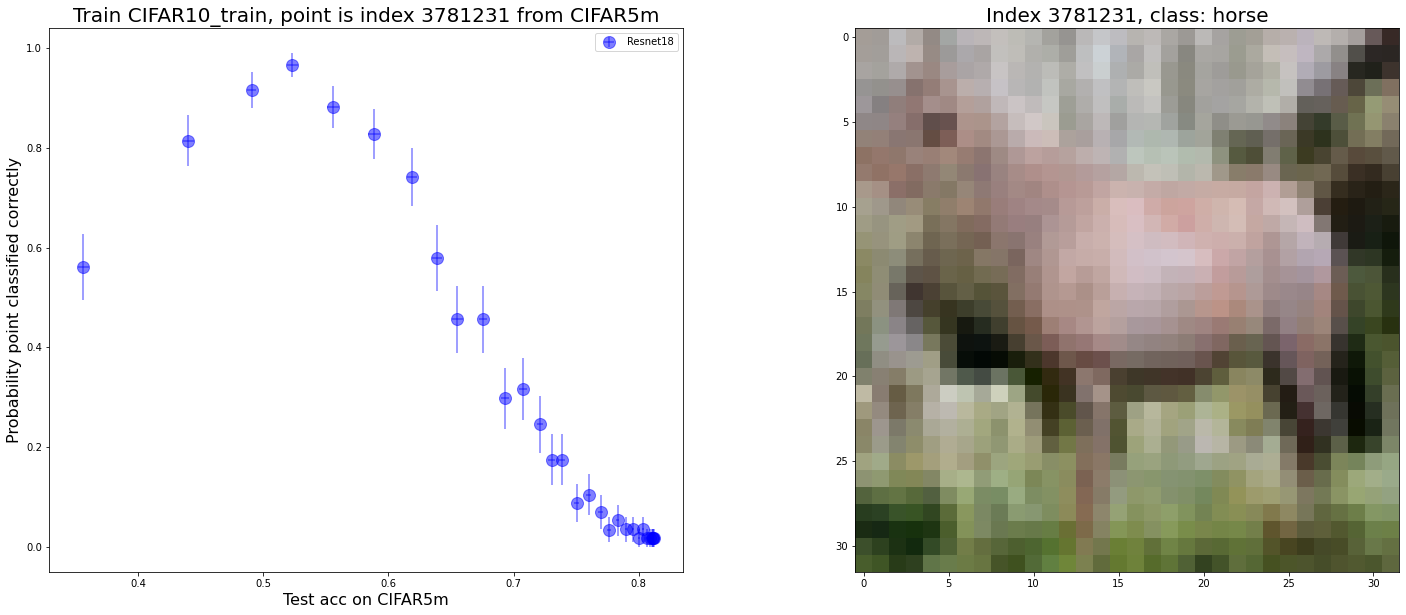

index 3203896


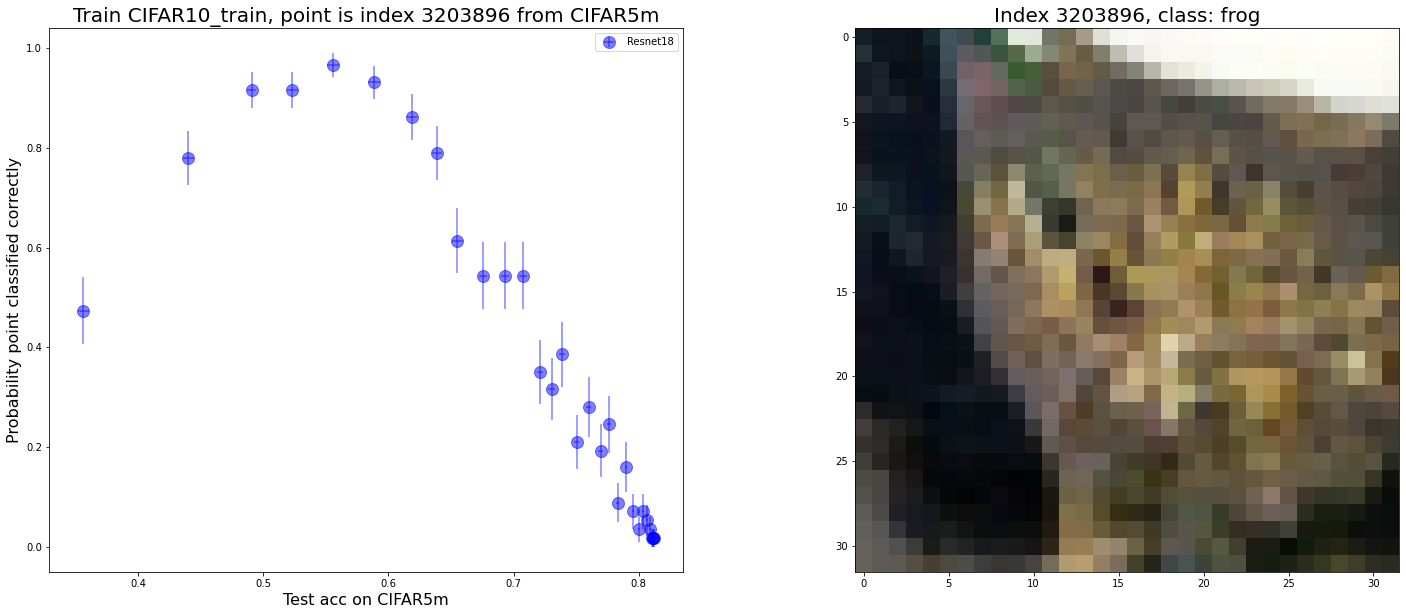

index 868780


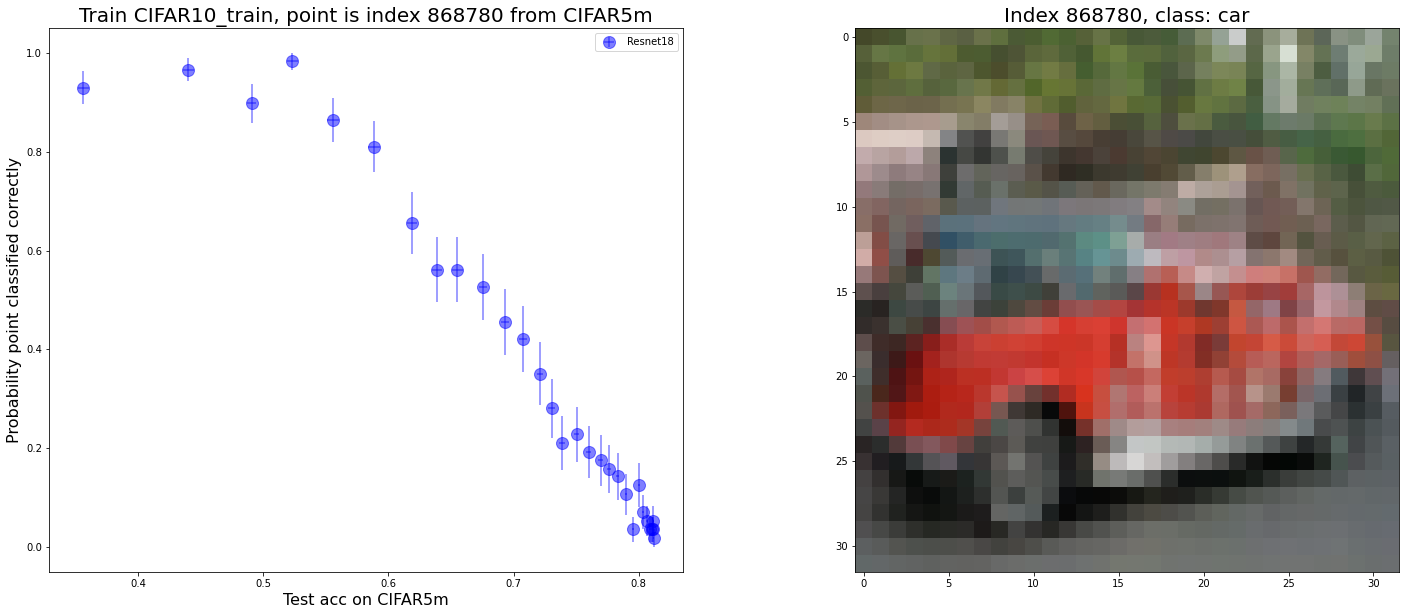

index 2937482


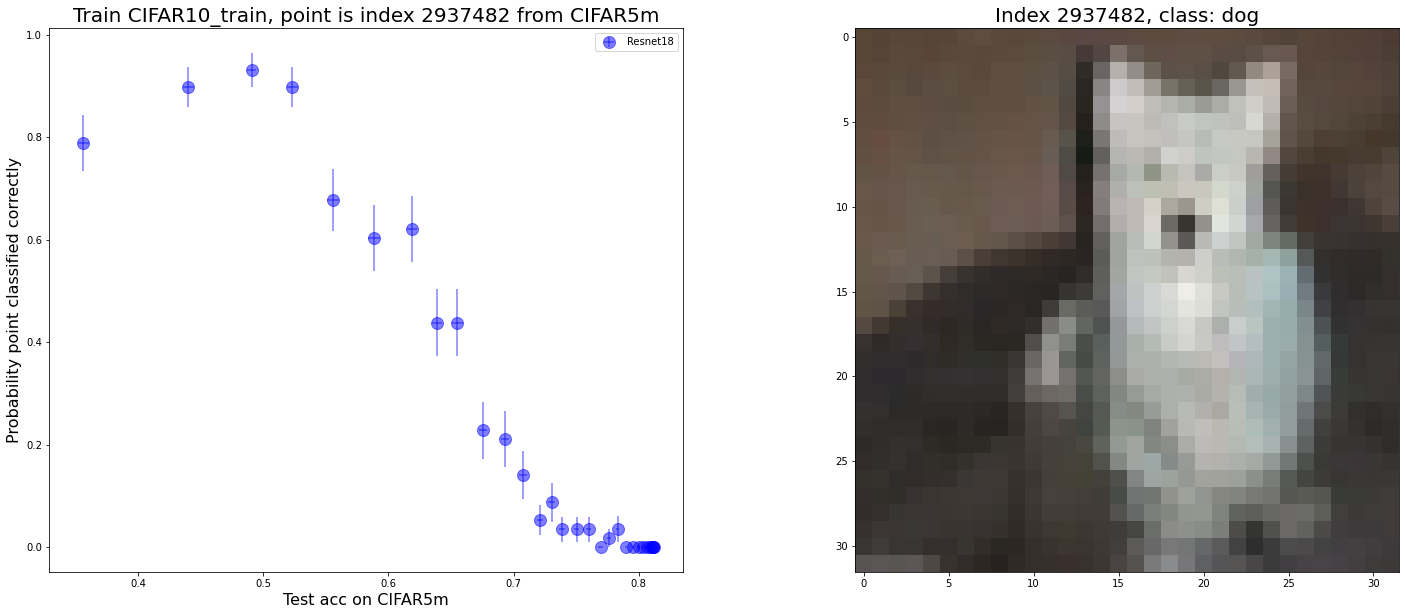

index 2805615


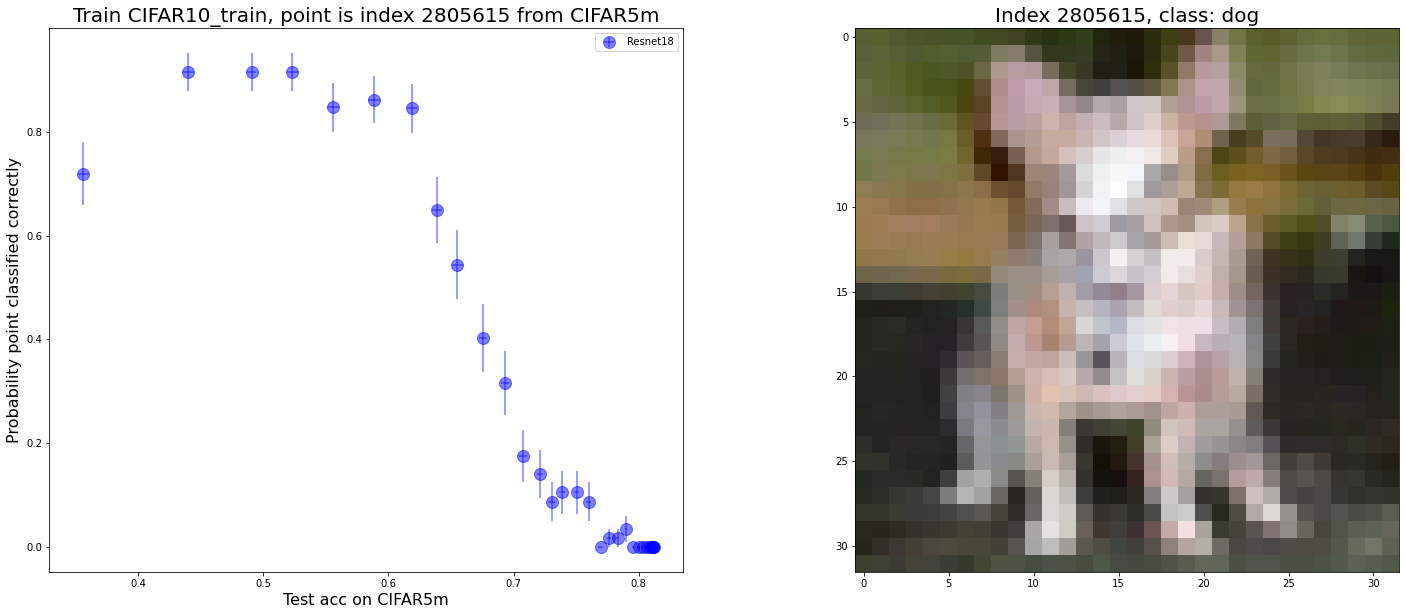

index 2870578


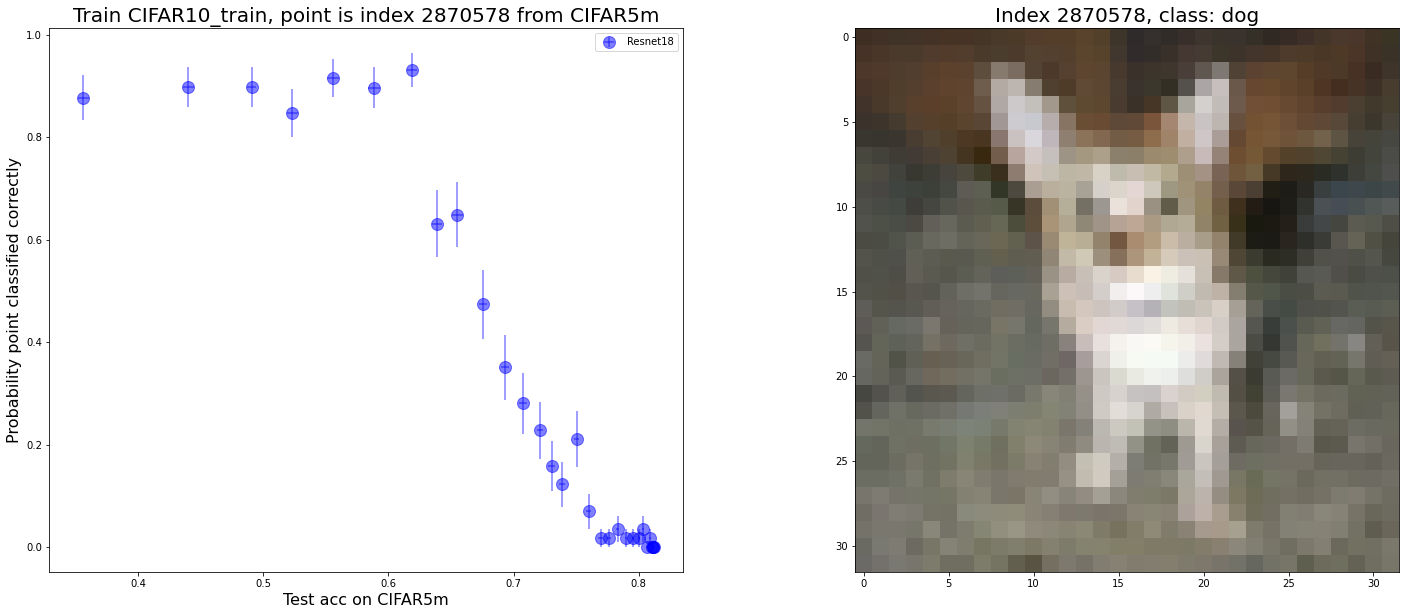

index 2982374


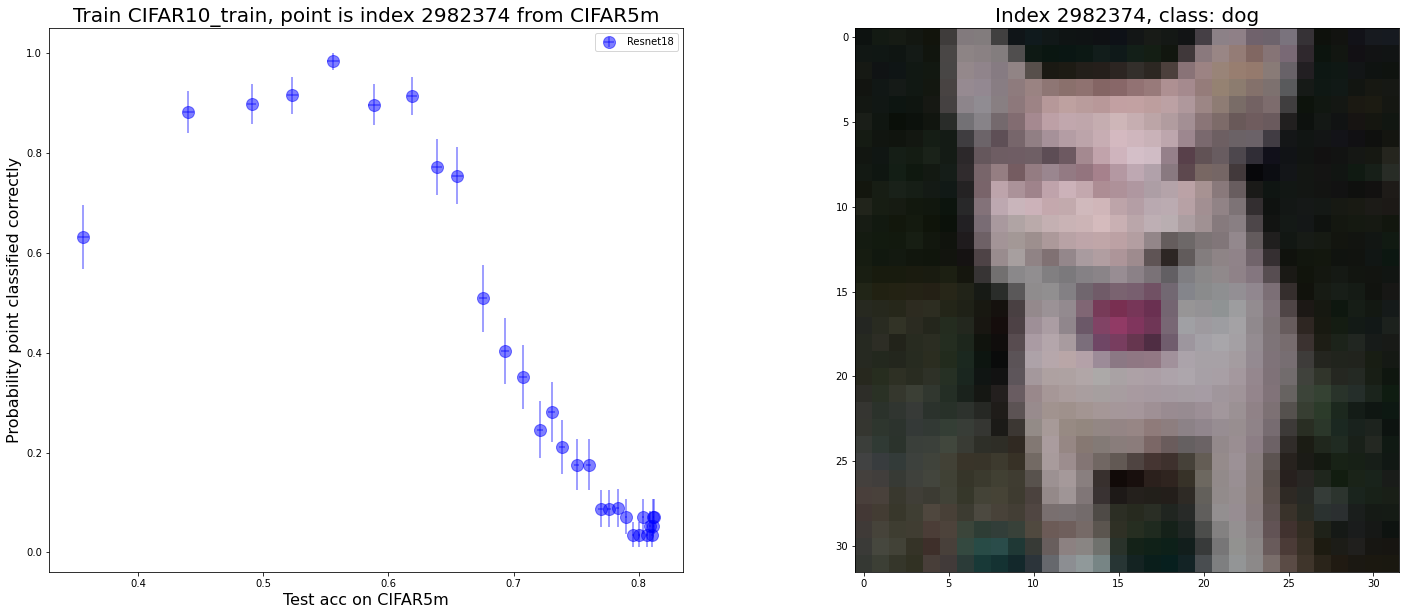

index 4028217


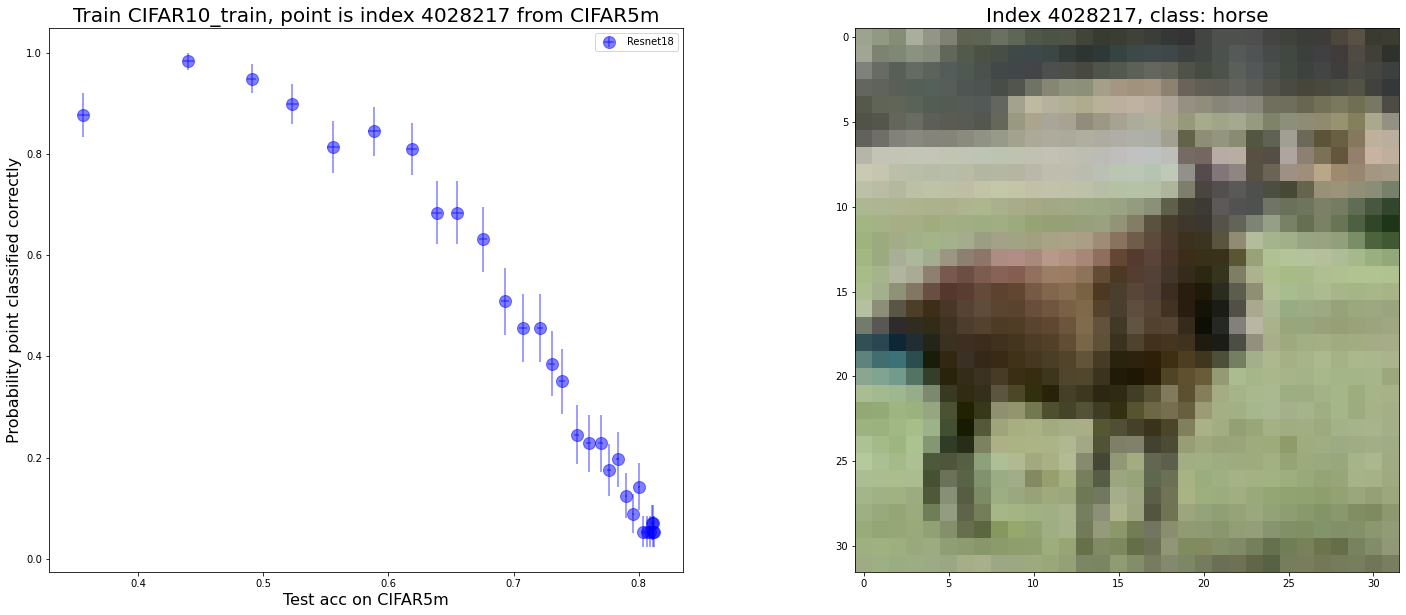

In [49]:
print(indexes)

# point plots
for idx in indexes:
    print("index %d" % idx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        ax1.errorbar(
            dct["x"],
            dct["points"][idx],
            yerr=dct["points_err"][idx],
            xerr=dct["x_err"],
            fmt=fmts[plot_group],
            alpha=alpha,
            markersize=markersize,
            label=plot_group,
        )

    ax1.set_xlabel("Test acc on %s" % valid_set, fontsize=16)
    ax1.set_ylabel("Probability point classified correctly", fontsize=16)
    ax1.set_title(
        "Train %s, point is index %d from %s" % (train_set, idx, name),
        fontsize=20,
    )

    ax1.legend(loc="best")
    img, label = dataset.__getitem__(idx)
    img = np.array(img)
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d, class: %s" % (idx, class_lists[name][label]), fontsize=20)
    plot_path = join(save_dir, name, ind_type)
    if not os.path.isdir(plot_path):
        os.mkdir(plot_path)
    plt.savefig(join(plot_path, "plot_acc_" + str(idx) + ".png"))
    plt.show()


10
label 0


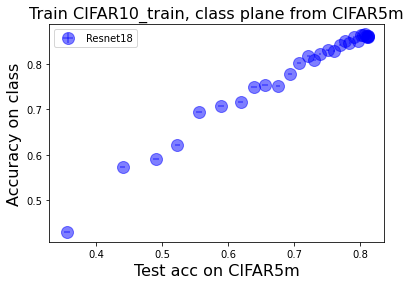

label 1


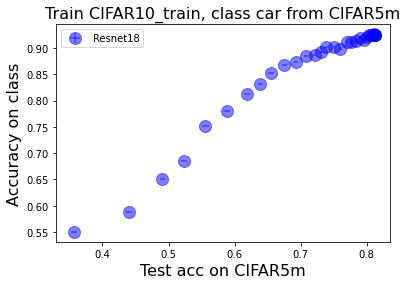

label 2


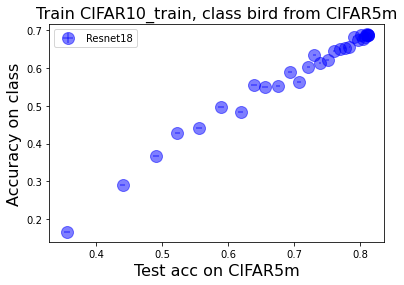

label 3


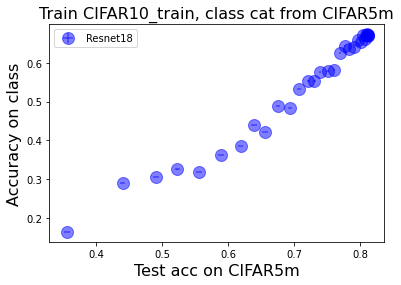

label 4


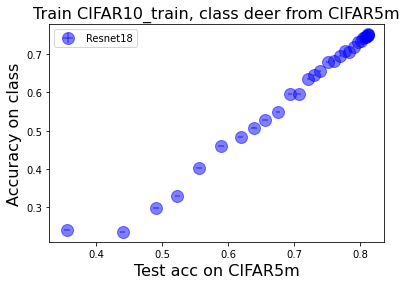

label 5


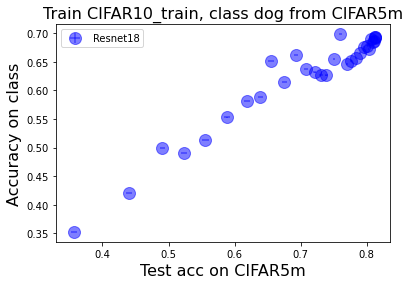

label 6


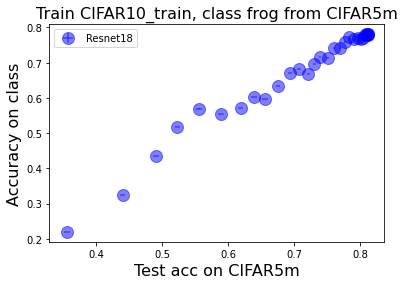

label 7


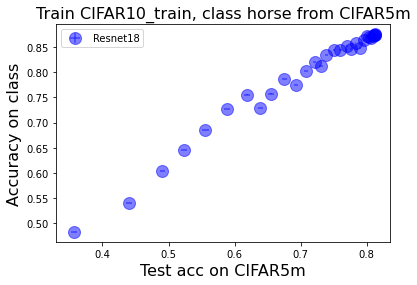

label 8


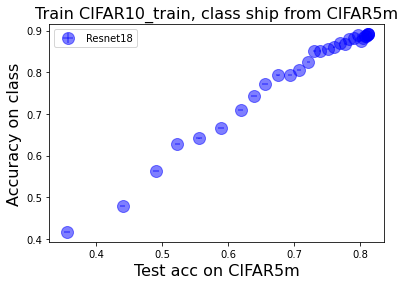

label 9


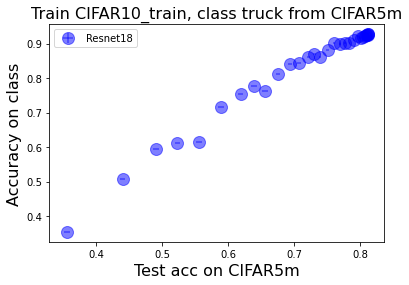

In [33]:
# class plots
# plotting only first few classes for simplicity
num_classes = len(class_lists[name])
num_classes = min(num_classes, num_figs)
for label in range(num_classes):
    print("label %d" % label)
    plt.figure()
    for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        plt.errorbar(
            dct["x"],
            dct["labels"][label],
            yerr=dct["labels_err"][label],
            xerr=dct["x_err"],
            fmt=fmts[plot_group],
            alpha=alpha,
            markersize=markersize,
            label=plot_group,
        )

    plt.xlabel("Test acc on %s" % name, fontsize=16)
    plt.ylabel("Accuracy on class", fontsize=16)
    plt.title(
        "Train %s, class %s from %s" % (train_set, class_lists[name][label], name),
        fontsize=16,
    )

    plt.legend(loc="best")
    class_path = join(save_dir, name, "classes")
    if not os.path.isdir(class_path):
        os.mkdir(class_path)
    plt.savefig(join(class_path, "plot_acc_class" + str(label) + ".png"))
    plt.show()


index 5426
probs


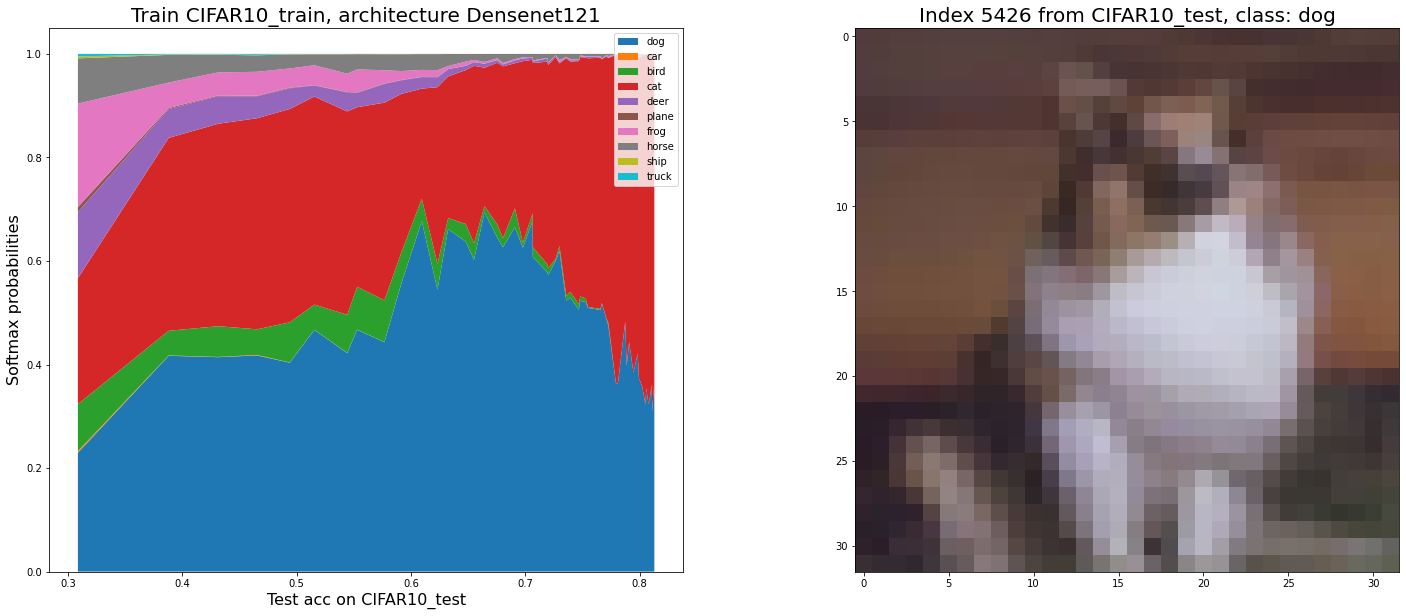

freqs


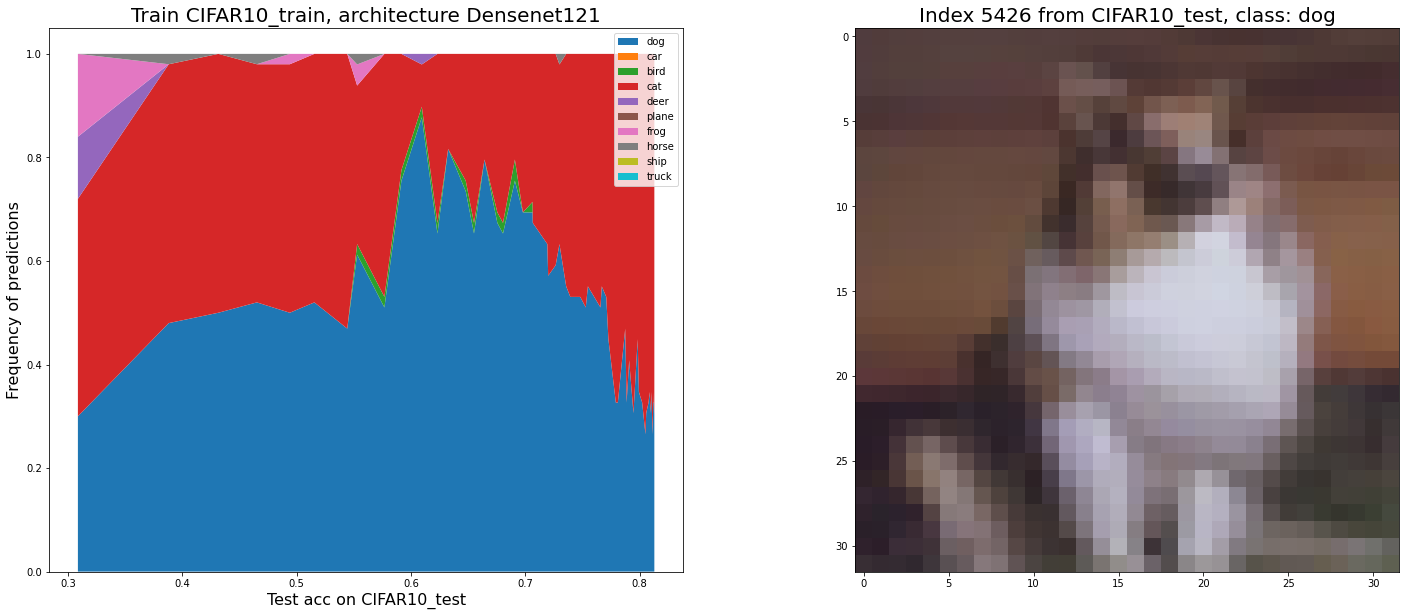

index 7217
probs


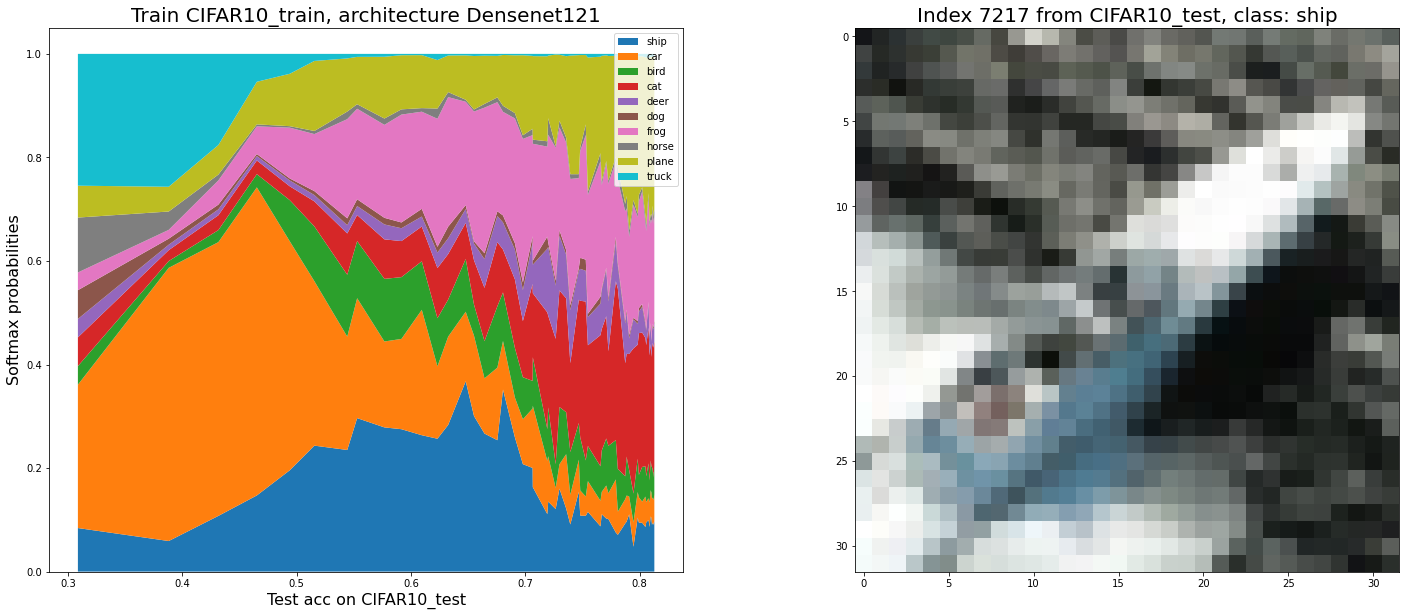

freqs


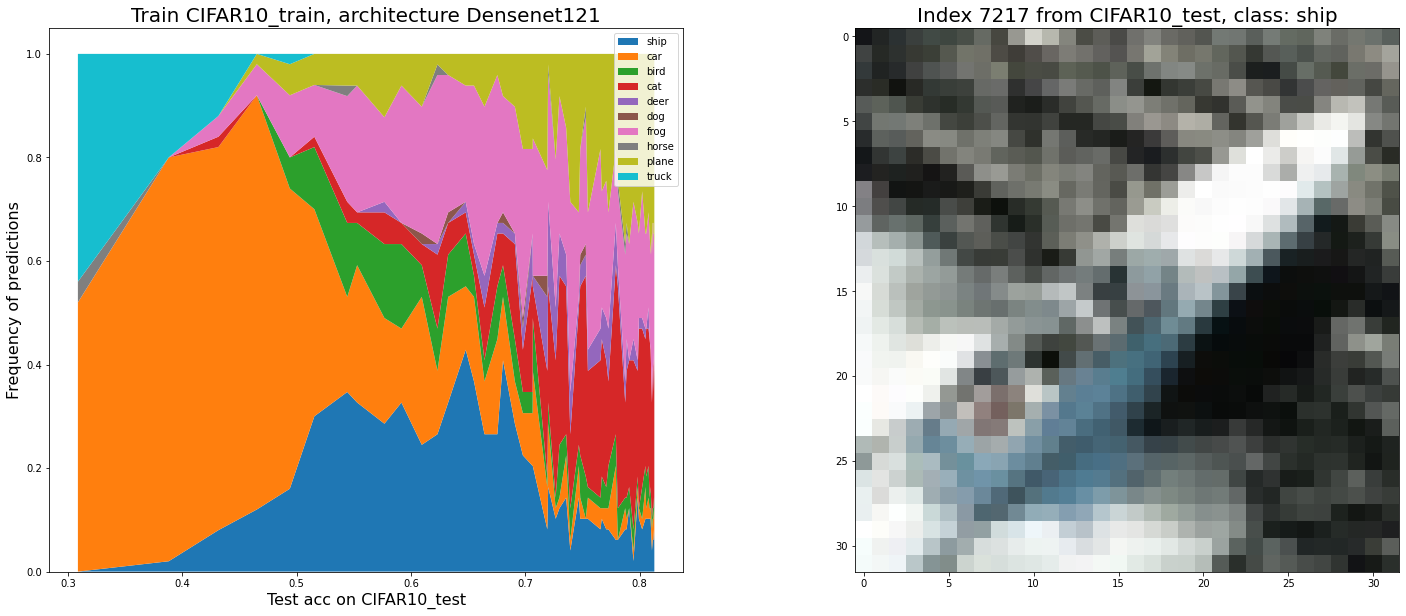

In [59]:
plot_group = "Densenet121"
dct = grouped[name][plot_group]
plot_path = join(save_dir, name, plot_group, ind_type)

# stack plots (needs data with stored logits)
for idx in indexes:
    print("index %d" % idx)
    img, label = dataset.__getitem__(idx)
    img = np.array(img)

    # probs
    print("probs")
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    y = dct["probs"][idx]
    y[[0, label]] = y[[label, 0]]
    labels = classes.copy()
    labels[0], labels[label] = labels[label], labels[0]
    ax1.stackplot(dct["x"], y, labels=labels)
    ax1.set_xlabel("Test acc on %s" % name, fontsize=16)
    ax1.set_ylabel("Softmax probabilities", fontsize=16)
    ax1.set_title(
        "Train %s, architecture %s" % (train_set, plot_group),
        fontsize=20,
    )

    ax1.legend(loc="best")
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d from %s, class: %s" % (idx, name, class_lists[name]), fontsize=20)

    if not os.path.isdir(plot_path):
        os.mkdir(plot_path)
    if not os.path.isdir(join(plot_path, "probs")):
        os.mkdir(join(plot_path, "probs"))
    plt.savefig(join(plot_path, "probs", "plot_probs_" + str(idx) + ".png"))
    plt.show()

    # freqs
    print("freqs")
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    y = dct["freqs"][idx]
    y[[0, label]] = y[[label, 0]]
    labels = classes.copy()
    labels[0], labels[label] = labels[label], labels[0]
    ax1.stackplot(dct["x"], y, labels=labels)
    ax1.set_xlabel("Test acc on %s" % name, fontsize=16)
    ax1.set_ylabel("Frequency of predictions", fontsize=16)
    ax1.set_title(
        "Train %s, architecture %s" % (train_set, plot_group),
        fontsize=20,
    )

    ax1.legend(loc="best")
    img, label = dataset.__getitem__(idx)
    img = np.array(img)
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d from %s, class: %s" % (idx, name, class_lists[name]), fontsize=20)
    if not os.path.isdir(plot_path):
        os.mkdir(plot_path)
    if not os.path.isdir(join(plot_path, "freqs")):
        os.mkdir(join(plot_path, "freqs"))
    plt.savefig(join(plot_path, "freqs", "plot_freqs_" + str(idx) + ".png"))
    plt.show()